In [1]:
import module_data
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [2]:
Rs       = [0, 0.1, 0.2, 0.3, 0.4]
channels = ["VzToZhToVevebb", "VzToQCD", "VzToTt"]
events   = [[module_data.FatJetEvents(channel=c, cut_pt=(800,1000), subjet_radius=R) for R in Rs] for c in channels]

num_radius   = len(Rs)
num_channels = len(channels)

DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.hdf5
DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.1.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.1.hdf5
DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.2.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.2.hdf5
DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.3.hdf5


DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.3.hdf5
DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.4.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.4.hdf5
DataLog: Now loading hdf5 file VzToQCD|c800_1000_r0.hdf5
DataLog: Successfully loading hdf5 file VzToQCD|c800_1000_r0.hdf5
DataLog: Now loading hdf5 file VzToQCD|c800_1000_r0.1.hdf5
DataLog: Successfully loading hdf5 file VzToQCD|c800_1000_r0.1.hdf5
DataLog: Now loading hdf5 file VzToQCD|c800_1000_r0.2.hdf5
DataLog: Successfully loading hdf5 file VzToQCD|c800_1000_r0.2.hdf5
DataLog: Now loading hdf5 file VzToQCD|c800_1000_r0.3.hdf5
DataLog: Successfully loading hdf5 file VzToQCD|c800_1000_r0.3.hdf5
DataLog: Now loading hdf5 file VzToQCD|c800_1000_r0.4.hdf5
DataLog: Successfully loading hdf5 file VzToQCD|c800_1000_r0.4.hdf5
DataLog: Now loading hdf5 file VzToTt|c800_1000_r0.hdf5
DataLog: Successfully loading hdf5 file VzToTt|c800_1000_r0.hdf5
DataLog: Now loading hdf5 file V

In [3]:
for i in range(len(channels)):
    print(f"Channel = {channels[i]} | Lists of Pt of fatjets")
    for j in range(10):
        _event = ak.sort(events[i][0].events['fast_pt'][j], ascending=False)
        print(f"Events {j+1}:")
        _interval = 10
        for k in range(10):
            idx_start, idx_end = k*_interval, (k+1)*_interval
            print(f"    Index {idx_start:2d}:{idx_end-1:2d} = {_event[idx_start:idx_end]}")
    print("-"*100)

Channel = VzToZhToVevebb | Lists of Pt of fatjets
Events 1:
    Index  0: 9 = [134, 101, 86.2, 63.4, 55.7, 47.3, 46.5, 46.5, 43.8, 42.6]
    Index 10:19 = [39.9, 34.3, 31.4, 27.8, 20.2, 19.7, 19.7, 14.2, 13.3, 11.7]
    Index 20:29 = [9.57, 7.58, 6.74, 6.68, 5.41, 3.73, 3.65, 3.61, 3.61, 3.58]
    Index 30:39 = [3.52, 2.76, 2, 1.85, 1.7, 1.39, 1.39, 1.22, 0.738, 0.205]
    Index 40:49 = []
    Index 50:59 = []
    Index 60:69 = []
    Index 70:79 = []
    Index 80:89 = []
    Index 90:99 = []
Events 2:
    Index  0: 9 = [290, 173, 173, 44.1, 44.1, 36.9, 31.8, 31.8, 30.4, 29.2]
    Index 10:19 = [29.2, 26.2, 15.9, 15.9, 15.2, 14.8, 11.5, 11.5, 10.5, 9.91]
    Index 20:29 = [9.36, 7.36, 6.85, 4.58, 4.27, 3.17, 2.98, 2.44, 1.96, 1.51]
    Index 30:39 = [1.51, 1.27, 0.518]
    Index 40:49 = []
    Index 50:59 = []
    Index 60:69 = []
    Index 70:79 = []
    Index 80:89 = []
    Index 90:99 = []
Events 3:
    Index  0: 9 = [158, 132, 48.2, 34.1, 33.1, 24.2, 23.9, 23.9, 23.6, 23.5]
    Ind

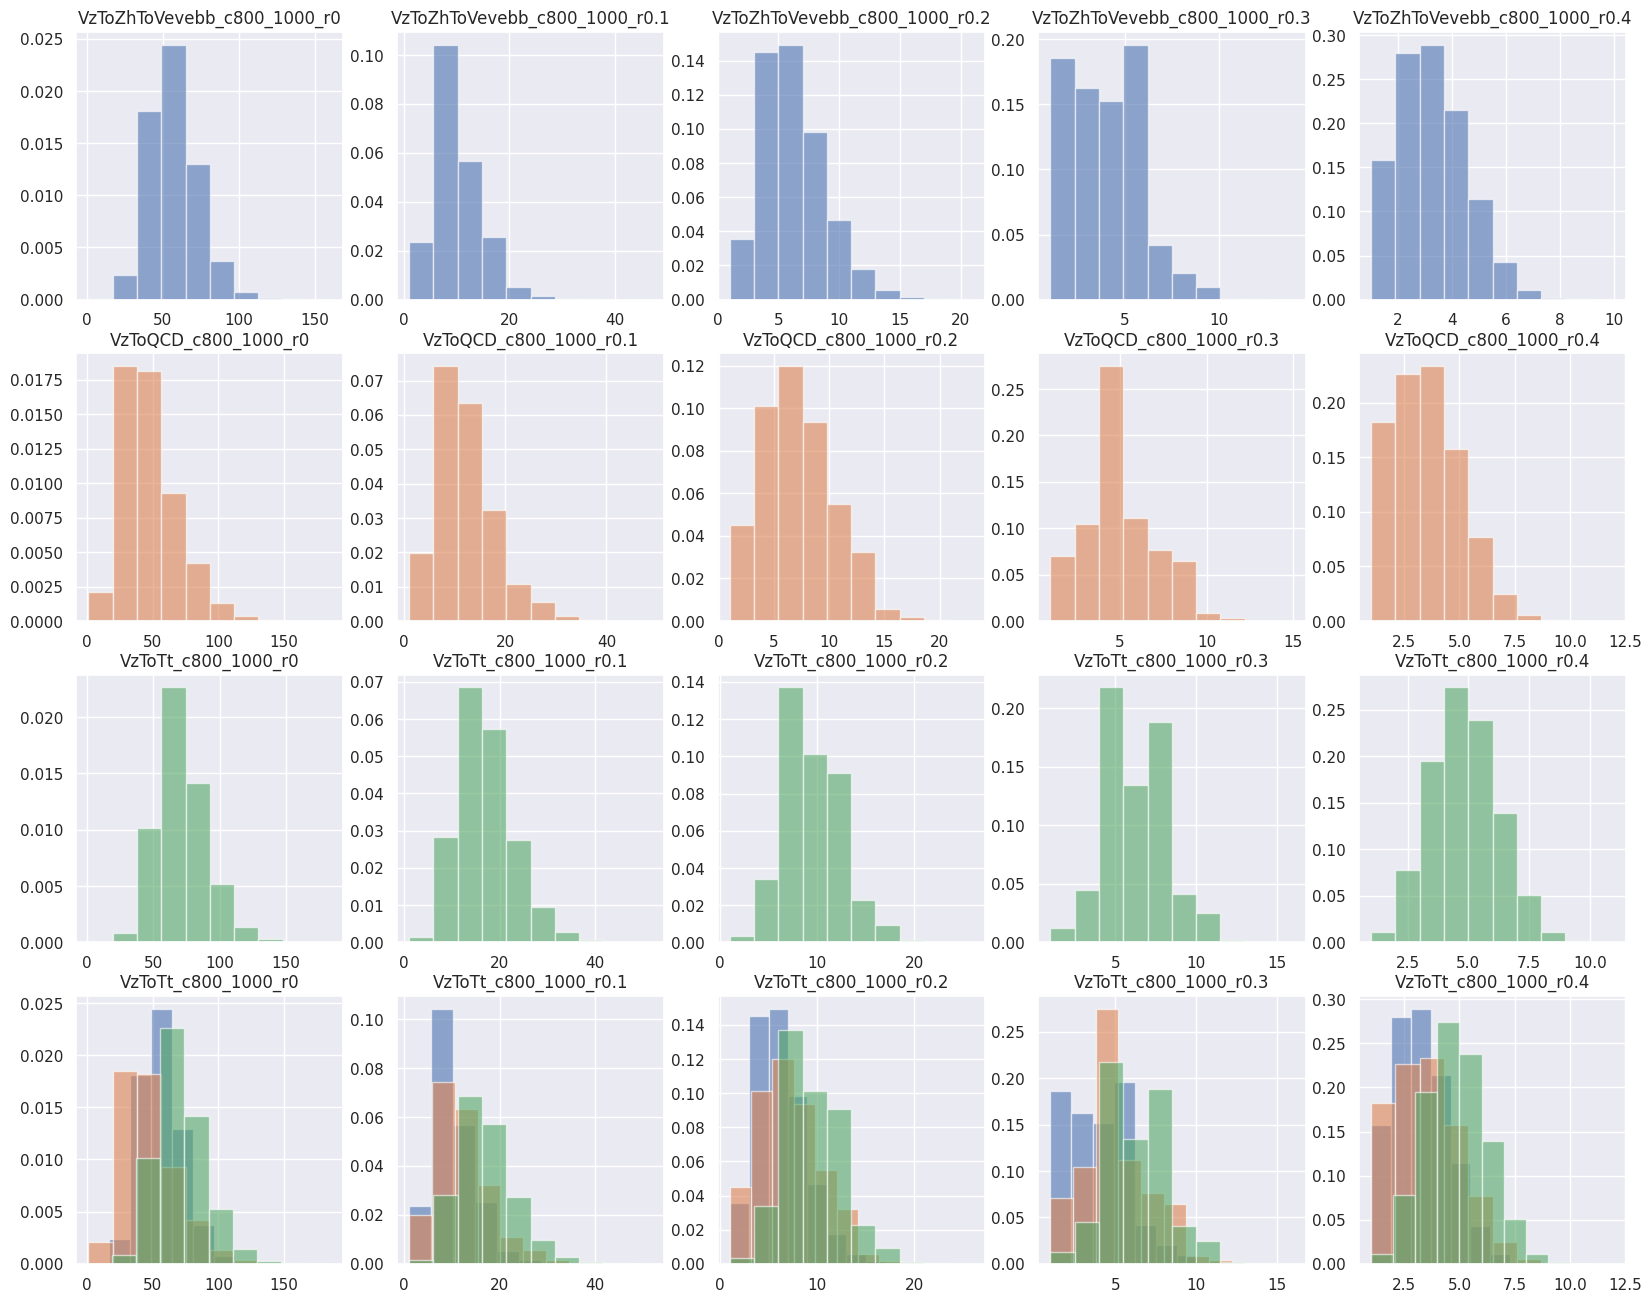

In [4]:
def draw_reclustered_num_ptcs(events, ax, idx):
    num_subjets = ak.num(events.events["fast_pt"], axis=1)
    ax.hist(num_subjets, bins=10, label=events.channel, range=None, 
        alpha=0.6, density=True, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][idx])
    ax.set_title(f"{events.channel}_c{800}_{1000}_r{events.subjet_radius}")

fig, axes = plt.subplots(num_channels+1, num_radius, figsize=(num_radius*4,(num_channels+1)*4))
for i in range(num_radius):
    for j in range(num_channels):
        draw_reclustered_num_ptcs(events[j][i], axes[j][i], idx=j)
        draw_reclustered_num_ptcs(events[j][i], axes[num_channels][i], idx=j)

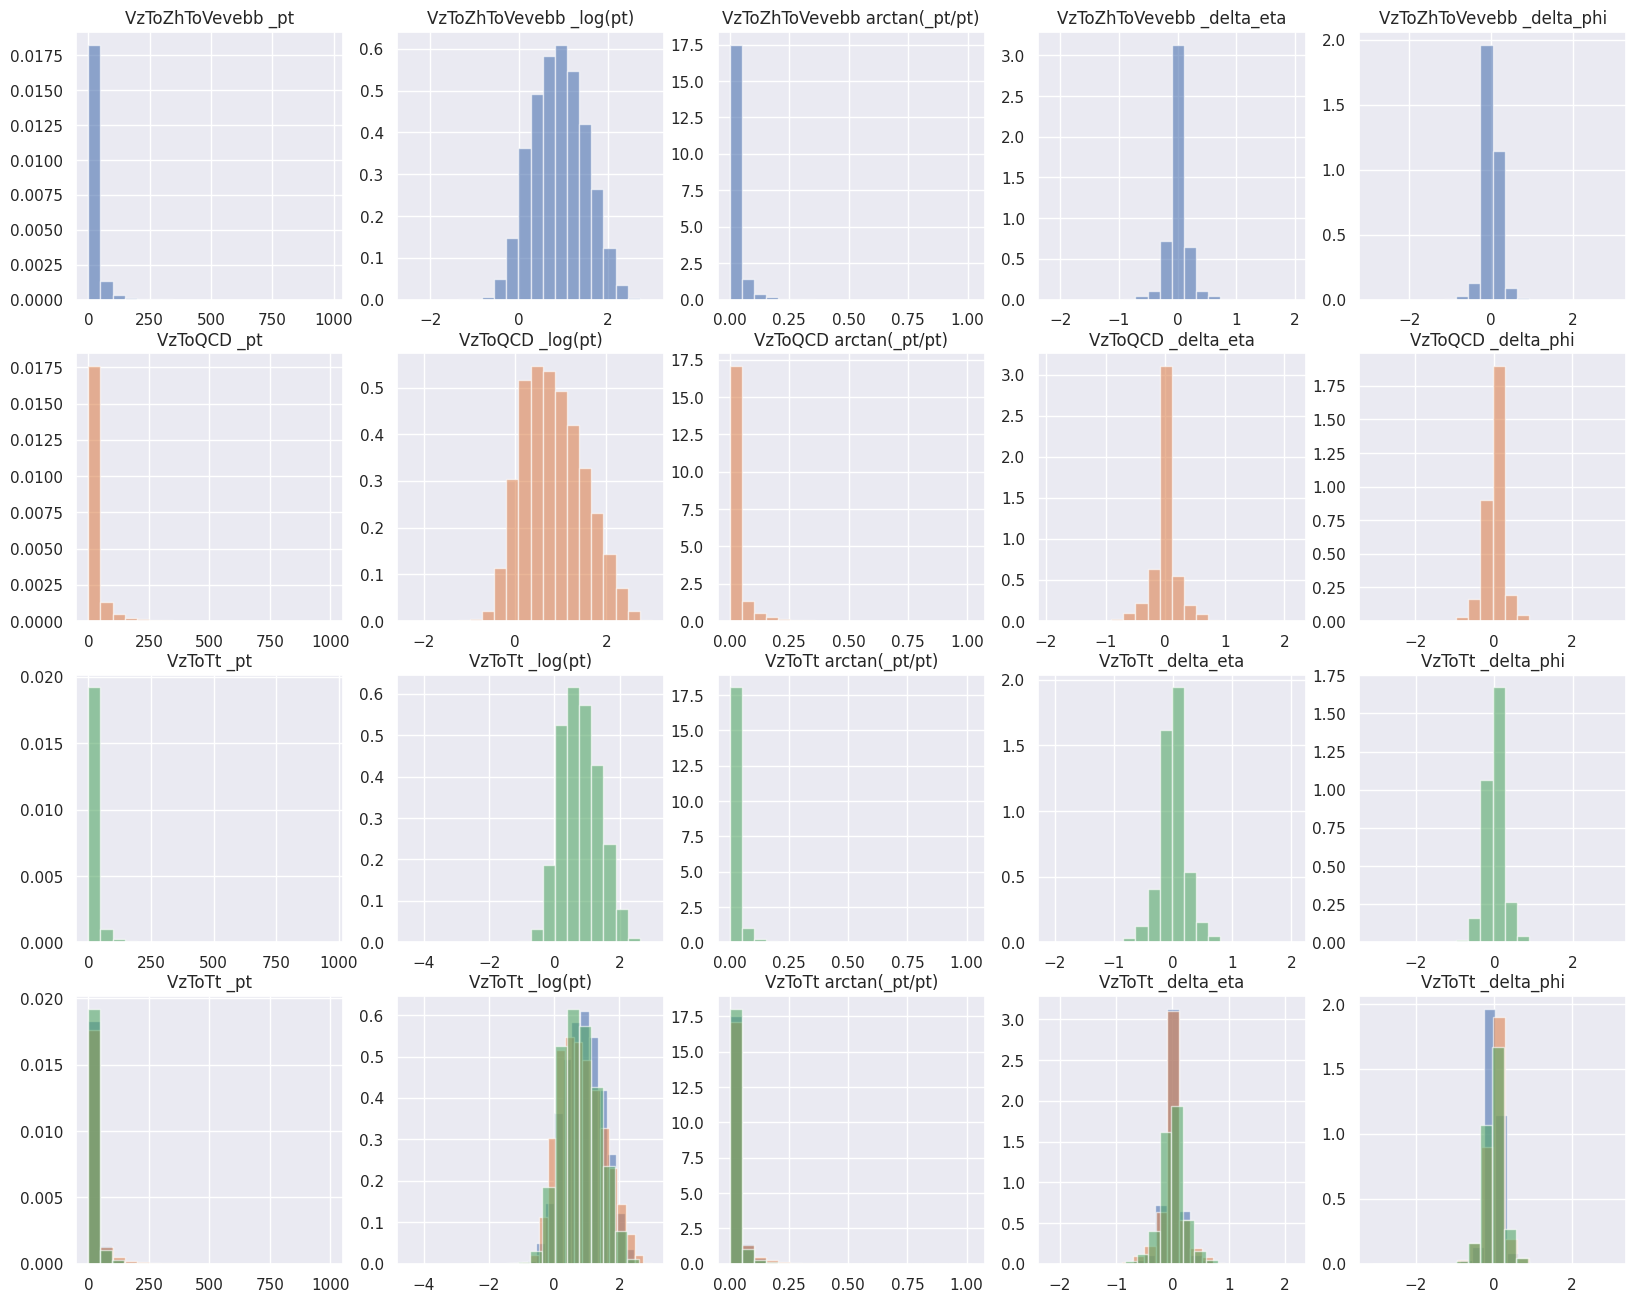

In [5]:
def draw_feature_hist(feature, channel, title, ax, idx):
    ax.hist(feature, bins=20, label=channel, range=None, alpha=0.6, density=True,
            color=plt.rcParams['axes.prop_cycle'].by_key()['color'][idx])
    ax.set_title(f"{channel} {title}")

def get_feature_events(events):
    return {
        "_pt"            : ak.ravel(events.events["fast_pt"]),
        "_log(pt)"       : ak.ravel(np.log10(events.events["fast_pt"])),
        "arctan(_pt/pt)" : ak.ravel(events.events["fast_pt"] / events.events["fatjet_pt"]),
        "_delta_eta"     : ak.ravel(events.events["fast_delta_eta"]),
        "_delta_phi"     : ak.ravel(events.events["fast_delta_phi"]),
    }

original_feature = [get_feature_events(events[c][0]) for c in range(num_channels)]
feature_keys     = list(original_feature[0].keys())
fig, axes        = plt.subplots(num_channels+1, len(feature_keys), figsize=(len(feature_keys)*4,(num_channels+1)*4))

for i in range(len(feature_keys)):
    for j in range(num_channels):
        key = feature_keys[i]
        draw_feature_hist(original_feature[j][key], events[j][0].channel, key, axes[j][i], idx=j)
        draw_feature_hist(original_feature[j][key], events[j][0].channel, key, axes[num_channels][i], idx=j)